# Welcome to 
<img src="logo.png">

In [1]:
import datetime
from dateutil.relativedelta import relativedelta
import math

Enter yout data:

In [2]:
birthday_date = datetime.datetime(1988, 3, 22)
gender = 1 #1 male, 0 female
height = 180
weight = 79.5

#less important
waist = 91
neck = 41
hip = 110#only important for females

In [3]:
today = datetime.date.today()
age = relativedelta(today, birthday_date).years
print(age)

31


# BMI

In [4]:
def BMI(height, weight):
    return weight/((height/100)**2)

In [5]:
print(BMI(height, weight))

24.537037037037035


<img src="bmi.png">

# Body Fat

In [6]:
def bodyFatPerc(BMI, age, gender):#% GC = (1,2 x IMC) + (0,23 x edad) - (10,8 x sexo) - 5,4 (donde sexo = 1 para varones y sexo = O para mujeres).
    return (1.2 * BMI) + (0.23 * age) - (10.8 * gender) - 5.4

In [7]:
print(bodyFatPerc(BMI(height, weight), age, gender))

20.374444444444435


In [8]:
def bodyFatPerc1(gender, height, waist, neck, hip):
    #% Grasa = 495 / (1.0324 - 0.19077 (log (cintura-cuello)) + 0.15456 (log(altura))) - 450 
    #% Grasa = 495/(1.29579-0.35004*(LOG(cintura+cadera-cuello))+0.221*(LOG(altura)))-450
    
    if waist is None or neck is None or hip is None:
        return bodyFatPerc(BMI(height, weight), age, gender)
    
    if gender == 1:
        return 495/(1.0324-0.19077*(math.log10(waist-neck))+0.15456*(math.log10(height)))-450
    else:
        return 495/(1.29579-0.35004*(math.log10(waist+hip-neck))+0.221*(math.log10(height)))-450
    

In [9]:
print(bodyFatPerc1(gender, height, waist, neck, hip))

18.367495150229843


In [10]:
def bodyFatPerc2(BMI, age, gender):
    #Porcentaje de grasa corporal en adultos = 1.39 * IMC + 0.16 * edad - 10.34 * género - 9
    return 1.39 * BMI + 0.16 * age - 10.34 * gender - 9


In [11]:
print(bodyFatPerc2(BMI(height, weight), age, gender))

19.726481481481475


# Waist Height Index Ratio

The waist-to-height index is defined as the ratio between waist circumference and height, both measured in the same units. 
Is a measure of the distribution of body fat. 
Higher values indicate a higher risk of obesity related to cardiovascular diseases, correlated with abdominal obesity 
more accurately than the body mass index.

In [12]:
def waist_height_index(waist, height):
    return waist/height

In [13]:
print(waist_height_index(waist, height))

0.5055555555555555


<img src="waist_to_height_ratio.png">

In [14]:
def AveragebodyFatPerc(weight, age, gender, height, waist, neck, hip):
    return (bodyFatPerc(BMI(height, weight), age, gender) + bodyFatPerc1(gender, height, waist, neck, hip) + bodyFatPerc2(BMI(height, weight), age, gender))/3

In [15]:
print(AveragebodyFatPerc(weight, age, gender, height, waist, neck, hip))

19.489473692051916


<img src="body_fat_categories.png">

In [16]:
def bodyLeanPerc(weight, age, gender, height, waist, neck, hip):
    return 100 - AveragebodyFatPerc(weight, age, gender, height, waist, neck, hip)

In [17]:
print(bodyLeanPerc(weight, age, gender, height, waist, neck, hip))

80.51052630794808


In [18]:
def leanWeight(weight, age, gender, height, waist, neck, hip):
    return weight * bodyLeanPerc(weight, age, gender, height, waist, neck, hip) / 100
    

In [19]:
print(leanWeight(weight, age, gender, height, waist, neck, hip))

64.00586841481872


# Quantity of kg to loose or gain

In [20]:
def expected_weight_for_body_fat_category(weight, age, gender, height, waist, neck, hip, category):
    essential_fat_w = (13+10)/2
    essential_fat_m = (5+2)/2
    athletes_w = (20+14)/2
    athletes_m = (13+6)/2
    fitness_w = (24+21)/2
    fitness_m = (17+14)/2
    average_w = (31+25)/2
    average_m = (24+18)/2
    bdp = leanWeight(weight, age, gender, height, waist, neck, hip)
    desired_fat = 0
    if gender == 0:#female
        if category == 'essential':
            desired_fat = essential_fat_w
        elif category == 'athletes':
            desired_fat = athletes_w
        elif category == 'fitness':
            desired_fat = fitness_w
        else:#average
            desired_fat = average_w
    else:#gender ==1, male
        #print("Entró a male")
        if category == 'essential':
            desired_fat = essential_fat_m
        elif category == 'athletes':
            desired_fat = athletes_m
        elif category == 'fitness':
            #print("Entró a fitness")
            desired_fat = fitness_m
        else:#average
            desired_fat = average_m
    #print("Peso magro: "+str(bdp))
    #print("Grasa deseada: "+str(desired_fat))
    return bdp*(1+desired_fat/100)

Enter your goal:

In [21]:
#essential, athletes, fitness or average
desired__category = 'fitness'

In [22]:
print(expected_weight_for_body_fat_category(weight, age, gender, height, waist, neck, hip, desired__category))

73.92677801911563


In [23]:
def quantity_of_kg_to_loose_or_gain(weight, age, gender, height, waist, neck, hip, desired__category):
    return expected_weight_for_body_fat_category(weight, age, gender, height, waist, neck, hip, desired__category) - weight
                                    

In [24]:
print(quantity_of_kg_to_loose_or_gain(weight, age, gender, height, waist, neck, hip, desired__category))

-5.5732219808843695


In [25]:
def calories_to_loose_or_gain(weight, age, gender, height, waist, neck, hip, desired__category):
    #To lose a kilo of fat, we will have to burn approximately 7,000 kcal
    return 7000*quantity_of_kg_to_loose_or_gain(weight, age, gender, height, waist, neck, hip, desired__category)

In [26]:
print(calories_to_loose_or_gain(weight, age, gender, height, waist, neck, hip, desired__category))

-39012.55386619059


# Metabolism and Caloric Expenditure

ecuaciones de Harris-Benedict 
    - Hombre: (10 x peso en kg) + (6.25 × altura en cm) - (5 × edad en años) + 5   
    - Mujer: (10 x peso en kg) + (6.25 × altura en cm) - (5 × edad en años) - 161

In [27]:
def basal_metabolism_harris_benedit(weight, age, gender, height):
    if gender == 1:
        bm=10*weight+6.25*height-5*age+5
    else:
        bm=10*weight+6.25*height-5*age-161
    return bm

In [28]:
print(basal_metabolism_harris_benedit(weight, age, gender, height))

1770.0


<img src="FAO-OMS-UNU.PNG">

In [29]:
def basal_metabolism_fao_oms_unu(weight, age, gender):
    if gender == 1:
        #print("Entró en Hombre")
        if age >= 0 and age <3:
            return 60.9*weight-54
        elif age >= 3 and age <10:
            return 22.7*weight+495
        elif age >= 10 and age <18:
            return 17.5*weight+651
        elif age >= 18 and age <30:
            return 15.3*weight+679
        elif age >= 30 and age <60:
            return 11.6*weight+879
        else:
            return 13.5*weight+487
    else:
        if age >= 0 and age <3:
            return 61*weight-51
        elif age >= 3 and age <10:
            return 22.5*weight+499
        elif age >= 10 and age <18:
            return 12.2*weight+746
        elif age >= 18 and age <30:
            return 14.7*weight+496
        elif age >= 30 and age <60:
            return 8.7*weight+829
        else:
            return 10.5*weight+596

In [30]:
print(basal_metabolism_fao_oms_unu(weight, age, gender))

1801.1999999999998


In [31]:
def average_basal_metabolism(weight, age, gender, height):
    return (basal_metabolism_harris_benedit(weight, age, gender, height) + basal_metabolism_fao_oms_unu(weight, age, gender))/2

In [32]:
print(average_basal_metabolism(weight, age, gender, height))

1785.6


<img src="activity_factor.PNG">

Enter your Activity Level

In [33]:
#Sedentary, Lightly Active, Moderately Active, Very Active, Extremely Active
activity_level = "Sedentary"

In [34]:
def caloric_expenditure(weight, age, gender, height, activity_level):
    activity_factor = 0
    if activity_level == "Sedentary":
        activity_factor = 1.2
    elif activity_level == "Lightly Active":
        activity_factor = 1.375
    elif activity_level == "Moderately Active":
        activity_factor = 1.55
    elif activity_level == "Very Active":
        activity_factor = 1.725
    else:
        activity_factor = 1.9
    return activity_factor * average_basal_metabolism(weight, age, gender, height)

In [35]:
print(caloric_expenditure(weight, age, gender, height, activity_level))

2142.72


# Caloric Surplus or Deficit

A calorie deficit of 500 calories per day is effective for healthy and sustainable weight loss.
Also a calorie deficit of 25%

In [36]:
def caloric_surplus_or_deficit(weight, age, gender, height, activity_level):
    max_perc = 0.25
    max_absolute_limit = 500
    surplus_or_deficit = caloric_expenditure(weight, age, gender, height, activity_level)*max_perc
    #print(surplus_or_deficit)
    if surplus_or_deficit > max_absolute_limit:
        return max_absolute_limit
    else:
        return surplus_or_deficit
    

In [37]:
print(caloric_surplus_or_deficit(weight, age, gender, height, activity_level))

500


In [38]:
def calories_to_eat(weight, age, gender, height, activity_level):
    return caloric_expenditure(weight, age, gender, height, activity_level) - caloric_surplus_or_deficit(weight, age, gender, height, activity_level)

In [39]:
print(calories_to_eat(weight, age, gender, height, activity_level))

1642.7199999999998


In [40]:
def protein_to_eat(weight):
    return 1.9*weight 

In [41]:
def fat_to_eat(weight):
    return 0.7*weight

In [42]:
def carb_to_eat(weight, age, gender, height, activity_level):
    proteing_kcal = protein_to_eat(weight)*4
    fat_kcal = fat_to_eat(weight)*9
    total_kcal = calories_to_eat(weight, age, gender, height, activity_level)
    carb_kcal = total_kcal - fat_kcal - proteing_kcal
    return carb_kcal/4

In [43]:
#Multi-Objective Knapsack Problem
c = [21, 25, 15, 28, 13, 19]#costos

A = [[1,0,0,1,0,0],[0,1,0,0,1,0],[0,0,1,0,0,1],[1,1,1,0,0,0],[0,0,0,1,1,1]]
b = [20,20,25,25,40]
from scipy.optimize import linprog
res = linprog(c, A_eq=A, b_eq=b)
print(res)

     con: array([1.82655668e-10, 1.83241866e-10, 2.33647768e-10, 2.22726726e-10,
       3.76815024e-10])
     fun: 1134.9999999895324
 message: 'Optimization terminated successfully.'
     nit: 5
   slack: array([], dtype=float64)
  status: 0
 success: True
       x: array([2.00000000e+01, 1.41102005e-12, 5.00000000e+00, 2.14309717e-12,
       2.00000000e+01, 2.00000000e+01])


C:\Users\hector\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: OptimizeWarning: A_eq does not appear to be of full row rank. To improve performance, check the problem formulation for redundant equality constraints.
  import sys


In [44]:
import pandas as pd
recipies_file = pd.read_csv('epi_r.csv')

In [45]:
recipies_file.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
recipies_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20052 entries, 0 to 20051
Columns: 680 entries, title to turkey
dtypes: float64(679), object(1)
memory usage: 104.0+ MB


In [47]:
recipies_file = recipies_file.dropna(subset=['calories', 'protein', 'fat'])
recipies_file.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,The Best Blts,4.375,948.0,19.0,79.0,1042.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
recipies_file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15866 entries, 0 to 20051
Columns: 680 entries, title to turkey
dtypes: float64(679), object(1)
memory usage: 82.4+ MB


In [49]:
recipies_file.shape

(15866, 680)

In [50]:
#recipies_file.columns.displayall()
list(recipies_file.columns)

['title',
 'rating',
 'calories',
 'protein',
 'fat',
 'sodium',
 '#cakeweek',
 '#wasteless',
 '22-minute meals',
 '3-ingredient recipes',
 '30 days of groceries',
 'advance prep required',
 'alabama',
 'alaska',
 'alcoholic',
 'almond',
 'amaretto',
 'anchovy',
 'anise',
 'anniversary',
 'anthony bourdain',
 'aperitif',
 'appetizer',
 'apple',
 'apple juice',
 'apricot',
 'arizona',
 'artichoke',
 'arugula',
 'asian pear',
 'asparagus',
 'aspen',
 'atlanta',
 'australia',
 'avocado',
 'back to school',
 'backyard bbq',
 'bacon',
 'bake',
 'banana',
 'barley',
 'basil',
 'bass',
 'bastille day',
 'bean',
 'beef',
 'beef rib',
 'beef shank',
 'beef tenderloin',
 'beer',
 'beet',
 'bell pepper',
 'berry',
 'beverly hills',
 'birthday',
 'biscuit',
 'bitters',
 'blackberry',
 'blender',
 'blue cheese',
 'blueberry',
 'boil',
 'bok choy',
 'bon appétit',
 'bon app��tit',
 'boston',
 'bourbon',
 'braise',
 'bran',
 'brandy',
 'bread',
 'breadcrumbs',
 'breakfast',
 'brie',
 'brine',
 'brisk

In [51]:
def index_containing_substring(the_list, substring):
    x = pd.Series()
    for i, s in enumerate(the_list):
        if substring in s:
              x.at[i] = s
    return x

In [52]:
index_containing_substring(recipies_file.columns, 'to')

16             amaretto
35       back to school
65               boston
88              burrito
285             houston
400     nancy silverton
420             octopus
424         oktoberfest
494              potato
495        potato salad
500          prosciutto
597               stock
606    sweet potato/yam
625                tofu
626           tomatillo
627              tomato
628           tortillas
652          washington
653    washington, d.c.
676           leftovers
dtype: object

In [53]:
recipies_file.columns[627]

'tomato'

In [54]:
recipies_file_tomato = recipies_file[recipies_file['tomato']==1]
recipies_file_tomato.head(50)

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,The Best Blts,4.375,948.0,19.0,79.0,1042.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18,Mozzarella-Topped Peppers with Tomatoes and Ga...,5.000,107.0,5.0,7.0,344.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38,Grouper with Tomato and Basil,4.375,336.0,44.0,16.0,413.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41,"Baked Halibut with Orzo, Spinach, and Cherry T...",4.375,634.0,44.0,31.0,181.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46,Spicy Black Beans and Rice,3.750,202.0,19.0,8.0,815.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48,Mexican Lime Soup,4.375,338.0,14.0,21.0,174.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69,Tomato-Infused Bulgur Pilaf with Fresh Basil,0.000,195.0,7.0,5.0,469.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
92,Turkey and Pinto Bean Chili,4.375,508.0,45.0,17.0,826.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
100,Shrimp Gazpacho,4.375,285.0,19.0,7.0,635.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
#recipies_file.hist(column='calories')
recipies_file['calories'].describe()

count    1.586600e+04
mean     6.349883e+03
std      3.598257e+05
min      0.000000e+00
25%      1.990000e+02
50%      3.330000e+02
75%      5.870000e+02
max      3.011122e+07
Name: calories, dtype: float64

In [56]:
recipies_file['calories_new'] = recipies_file['calories'] 
recipies_file.loc[recipies_file['calories'] > recipies_file['calories'].quantile(0.99), 'calories_new'] = recipies_file['calories'].quantile(0.99)

In [57]:
recipies_file.hist(column='calories_new', bins=100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002087166FA88>]],
      dtype=object)

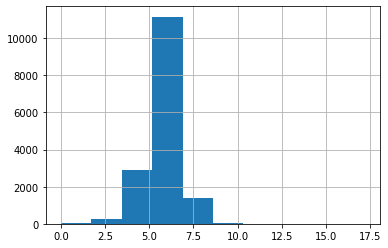

In [58]:
import numpy as np
np.log1p(recipies_file['calories']).hist()

In [59]:
def get_random_menus(quantity):
    '''This method receives an integer (quantity) and returns a list with that amount of elements. 
    Each element is a panda dataframe composed of three tuples, a breakfast, a lunch and a dinner'''
    menus = []
    recipies_file_breakfast = recipies_file[recipies_file['breakfast']==1]
    recipies_file_lunch = recipies_file[recipies_file['lunch']==1]
    recipies_file_dinner = recipies_file[recipies_file['dinner']==1]
    for i in range(quantity):
        random_breakfast = recipies_file_breakfast.sample(n=1)
        random_lunch = recipies_file_lunch.sample(n=1)
        random_dinner = recipies_file_dinner.sample(n=1)
        random_day_menu = pd.concat([random_breakfast, random_lunch, random_dinner])
        menus.append(random_day_menu)
    return menus
random_day_menu = get_random_menus(10000)


In [60]:
random_day_menu[4]

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey,calories_new
1259,Cottage Cheese Pancakes,3.75,320.0,17.0,12.0,370.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,320.0
4309,Crunchy Chicken Salad,3.75,531.0,34.0,41.0,858.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,531.0
17446,Sweet Stuffed Capon,5.00,946.0,75.0,64.0,266.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,946.0


In [61]:
def print_menu(menu):
    str = "Breakfast: "+menu.iloc[0]['title'].strip()+" - Lunch: "+menu.iloc[1]['title'].strip()+" - Dinner: "+menu.iloc[2]['title'].strip()
    #print(str)
    return str
print(print_menu(random_day_menu[4]))

Breakfast: Cottage Cheese Pancakes - Lunch: Crunchy Chicken Salad - Dinner: Sweet Stuffed Capon


In [62]:
def print_list_of_menus(list_of_menus):
    for i in range(len(list_of_menus)):
        print(str(i)+") "+print_menu(list_of_menus[i]))
print_list_of_menus(get_random_menus(6))

0) Breakfast: Sweet and Chunky Apple Butter - Lunch: Carroty Mac and Cheese - Dinner: Radish and Carrot Salad with Tuna and Capers
1) Breakfast: Popped Amaranth and Toasted Wheat Berry Fool - Lunch: Fontina, Corn and Jalapeño Quesadillas - Dinner: Tomato and Cheddar Pie
2) Breakfast: Apple-Raisin Bread Pudding - Lunch: Shrimp, Zucchini and Red Bell Pepper Bisque - Dinner: Soba Salad with Miso Dressing
3) Breakfast: Orange-Currant Scones - Lunch: Spiced Lamb in Pita - Dinner: Carrot Cardamom Soup
4) Breakfast: Golden Granola - Lunch: Potato-Crusted Quiche with Smoked Cheddar and Canadian Bacon - Dinner: Braised Turnip Greens with Turnips and Apples
5) Breakfast: Ham and Sage Ponice - Lunch: Steak and Onion Sandwiches with Horseradish Mayonnaise - Dinner: Provencal Chicken with Tomatoes, Olives, and Basil


In [63]:
def get_calories(menu):
    return menu['calories'].sum()

get_calories(random_day_menu[4])

1797.0

In [64]:
def get_protein(menu):
    return menu['protein'].sum()

get_protein(random_day_menu[4])

126.0

In [65]:
def get_fat(menu):
    return menu['fat'].sum()

get_fat(random_day_menu[4])

117.0

In [66]:
def get_carbs(menu):
    return (get_calories(menu)-4*get_protein(menu)-9*get_fat(menu))/4

get_carbs(random_day_menu[4])

60.0

In [67]:
def fitness_function(menu, weight, age, gender, height, activity_level):
    '''This method evaluates how well a menu adapts to the needs of the person. 
    According to their height, weight, etc. the calories and proteins, fats and carbohydrates that the person should consume are determined 
    So it's easy to evaluate how close to those specifications is the menu''' 
    cal_diff = abs(get_calories(menu) - calories_to_eat(weight, age, gender, height, activity_level))
    prot_diff = abs(get_protein(menu) - protein_to_eat(weight))
    fat_diff = abs(get_fat(menu)- fat_to_eat(weight))
    carb_diff = abs(get_carbs(menu) - carb_to_eat(weight, age, gender, height, activity_level))
    
    return cal_diff + 4*prot_diff + 9*fat_diff + 4*carb_diff
        
fitness_function(random_day_menu[4], weight, age, gender, height, activity_level)

1104.3000000000002

In [68]:
def sort(menu):
    return  fitness_function(menu, weight, age, gender, height, activity_level)

In [69]:
random_day_menu.sort(key = sort)



In [70]:
random_day_menu[0]#This is the menu that is closest to the needs of the person

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey,calories_new
8953,Apple Walnut Crisp,4.375,492.0,5.0,20.0,204.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,492.0
10777,"Lobster, Corn, and Potato Salad with Tarragon",3.750,832.0,117.0,20.0,3212.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,832.0
11074,Peppered Pork Tenderloin with Cherry Salsa,4.375,361.0,37.0,13.0,94.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,361.0


In [71]:
fitness_function(random_day_menu[0], weight, age, gender, height, activity_level)

132.2600000000003

In [72]:
pip install google_images_download

Note: you may need to restart the kernel to use updated packages.


In [73]:
def show_image(img_path):
    #from IPython.display import Image 
    from PIL import Image 
    pil_img = Image.open(img_path)
    
    basewidth = 300
    
    wpercent = (basewidth/float(pil_img.size[0]))
    hsize = int((float(pil_img.size[1])*float(wpercent)))
    img = pil_img.resize((basewidth,hsize), Image.ANTIALIAS)
    
    
    
    display(img)

In [74]:
from google_images_download import google_images_download  
import time  
response = google_images_download.googleimagesdownload()  
  
  
def downloadimages(query): 
    # keywords is the search query 
    # format is the image file format 
    # limit is the number of images to be downloaded 
    # print urs is to print the image file url 
    # size is the image size which can 
    # be specified manually ("large, medium, icon") 
    # aspect ratio denotes the height width ratio 
    # of images to download. ("tall, square, wide, panoramic") 
    arguments = {"keywords": query, "limit":1}#, 
                 #"format": "jpg", 
                 #"limit":4, 
                 #"print_urls":True, 
                 #"size": "medium", 
                 #"aspect_ratio: panoramic"} 

    while True:
        try:
            absolute_image_paths, url = response.download(arguments) 
            print("El diccionario que contiene los paths es ****************")
            print(absolute_image_paths)
            listita = list(absolute_image_paths.values())[0][0]
            break
        except:
            print("Entró al except")
            time.sleep(5)
        
    return listita

In [75]:

def download_menu_images(menu):
    list_img_path = []
    for element in menu['title']:
        element = element.replace(',','').strip().replace('ç','c').replace('"','')
        print("Voy a descargar la imagen de "+element)
        ruta_de_la_imagen = downloadimages(element)
        list_img_path.append(ruta_de_la_imagen)
    return list_img_path

In [76]:
best_menu = random_day_menu[0]
rutas = download_menu_images(best_menu)
for ruta in rutas:
    print(ruta)

Voy a descargar la imagen de Apple Walnut Crisp

Item no.: 1 --> Item name = Apple Walnut Crisp
Evaluating...
Starting Download...
Completed Image ====> 1.apple-crisp-ck-223084-x.jpg

Errors: 0

El diccionario que contiene los paths es ****************
{'Apple Walnut Crisp': ['C:\\Users\\hector\\downloads\\Apple Walnut Crisp\\1.apple-crisp-ck-223084-x.jpg']}
Voy a descargar la imagen de Lobster Corn and Potato Salad with Tarragon

Item no.: 1 --> Item name = Lobster Corn and Potato Salad with Tarragon
Evaluating...
Starting Download...
Completed Image ====> 1.103557.jpg

Errors: 0

El diccionario que contiene los paths es ****************
{'Lobster Corn and Potato Salad with Tarragon': ['C:\\Users\\hector\\downloads\\Lobster Corn and Potato Salad with Tarragon\\1.103557.jpg']}
Voy a descargar la imagen de Peppered Pork Tenderloin with Cherry Salsa

Item no.: 1 --> Item name = Peppered Pork Tenderloin with Cherry Salsa
Evaluating...
Starting Download...
Completed Image ====> 1.grilled-p

['C:\\Users\\hector\\downloads\\Apple Walnut Crisp\\1.apple-crisp-ck-223084-x.jpg', 'C:\\Users\\hector\\downloads\\Lobster Corn and Potato Salad with Tarragon\\1.103557.jpg', 'C:\\Users\\hector\\downloads\\Peppered Pork Tenderloin with Cherry Salsa\\1.grilled-pork-tenderloin-with-cherry-salsa.jpg']


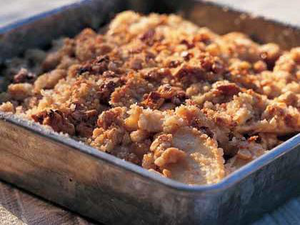

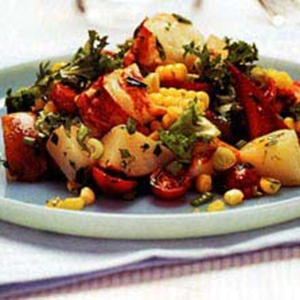

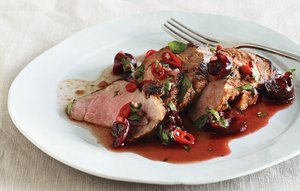

In [77]:
print(rutas)
for ruta in rutas:
    show_image(ruta)

In [78]:
import random
def menu_mutation(one_menu):
    recipies_file_breakfast = recipies_file[recipies_file['breakfast']==1]
    recipies_file_lunch = recipies_file[recipies_file['lunch']==1]
    recipies_file_dinner = recipies_file[recipies_file['dinner']==1]
    #print("*************************************************")
    #print("Origial Menu")
    #print(one_menu)
    item_a_mutar = random.randrange(3)
    if item_a_mutar == 0:
        #print("change breakfast")
        random_breakfast = recipies_file_breakfast.sample(n=1)
        #print("*************************************************")
        #print("*************************************************")
        #print(one_menu.iloc[[1]])
        #print("*************************************************")
        #print("*************************************************")            
        #print(one_menu.iloc[[2]])
        #print("*************************************************")
        #print("*************************************************")
        #print("random_breakfast")
        #print(random_breakfast)
        #print("*************************************************")
        #print("*************************************************")
        one_menu = pd.concat([random_breakfast, one_menu.iloc[[1]], one_menu.iloc[[2]]])
    elif item_a_mutar == 1:
        #print("change lunch")
        random_lunch = recipies_file_lunch.sample(n=1)
        one_menu = pd.concat([one_menu.iloc[[0]], random_lunch, one_menu.iloc[[2]]])
    else:
        #print("change dinner")
        random_dinner = recipies_file_dinner.sample(n=1)
        one_menu = pd.concat([one_menu.iloc[[0]],  one_menu.iloc[[1]], random_dinner])
    #print("Mutated menu")
    #print(one_menu)
    return one_menu
#random_day_menu[0] = menu_mutation(random_day_menu[0])

In [79]:
#print(random_day_menu[0])

In [80]:
import random
def menu_list_mutation(menu_list):
    new_list = []
    for menu in menu_list:
        menu = menu_mutation(menu)
        new_list.append(menu)
    return new_list

In [81]:
def evolution_with_only_mutations(menu_list):
    print("Entré a evolution_with_only_mutations")
    original_population_size = len(menu_list)
    one_third = int(round(len(menu_list)/3, 0))
    del menu_list[one_third:]
    menus_to_mutate1 = menu_list.copy()
    menus_to_mutate1 = menu_list_mutation(menus_to_mutate1)
    menus_to_mutate2 = menu_list.copy()
    menus_to_mutate2 = menu_list_mutation(menus_to_mutate2)
    new_generation = menu_list + menus_to_mutate1 + menus_to_mutate2
    new_generation.sort(key = sort)
    #print(new_generation[0])
    return new_generation

In [82]:
def evolution(menu_list):
    original_population_size = len(menu_list)
    one_third = int(round(len(menu_list)/3, 0))
    del menu_list[one_third:]
    menus_to_mutate = menu_list.copy()
    menus_to_mutate = menu_list_mutation(menus_to_mutate)
    new_menus = get_random_menus(original_population_size-2*one_third)
    new_generation = menu_list + menus_to_mutate + new_menus
    new_generation.sort(key = sort)
    #print(new_generation[0])
    return new_generation

 

In [83]:
#Only 1 evolution
from time import time
print(random_day_menu[0])
print("fitness: "+str(fitness_function(random_day_menu[0], weight, age, gender, height, activity_level)))
print("***********************************************")
start_time = time()
random_day_menu = evolution(random_day_menu)
elapsed_time = time() - start_time
print("Elapsed time: %0.10f seconds." % elapsed_time)
print("After the evolution de best is")
print(random_day_menu[0])
print("fitness: "+str(fitness_function(random_day_menu[0], weight, age, gender, height, activity_level)))

                                                title  rating  calories  \
8953                              Apple Walnut Crisp    4.375     492.0   
10777  Lobster, Corn, and Potato Salad with Tarragon    3.750     832.0   
11074     Peppered Pork Tenderloin with Cherry Salsa    4.375     361.0   

       protein   fat  sodium  #cakeweek  #wasteless  22-minute meals  \
8953       5.0  20.0   204.0        0.0         0.0              0.0   
10777    117.0  20.0  3212.0        0.0         0.0              0.0   
11074     37.0  13.0    94.0        0.0         0.0              0.0   

       3-ingredient recipes  ...  yogurt  yonkers  yuca  zucchini  cookbooks  \
8953                    0.0  ...     0.0      0.0   0.0       0.0        0.0   
10777                   0.0  ...     0.0      0.0   0.0       0.0        0.0   
11074                   0.0  ...     0.0      0.0   0.0       0.0        0.0   

       leftovers  snack  snack week  turkey  calories_new  
8953         0.0    0.0      

In [84]:
def average_fitness_of_all_population(population):
    sum = 0
    for person in population:
        sum = sum + fitness_function(person, weight, age, gender, height, activity_level)
    return sum/len(population)

In [85]:
from time import time

def evoluntion_many_times(times, initial_population):
    print("ENTRE A EVOLUTION MANY TIMES. Population size "+str(len(initial_population)))
    start_time = time()
    random_day_menu = initial_population
    for i in range(times):
        print("Corrida "+str(i))
        print("Before the evolution de best was")
        print(print_menu(random_day_menu[0]))
        print("fitness of the best: "+str(fitness_function(random_day_menu[0], weight, age, gender, height, activity_level)))
        print("Average fitness population "+str(average_fitness_of_all_population(random_day_menu)))
        #print_list_of_menus(random_day_menu)
        print("***********************************************")
        
        random_day_menu = evolution(random_day_menu)
        #random_day_menu = evolution_with_only_mutations(random_day_menu)
        
        print("After the evolution de best is")
        print(print_menu(random_day_menu[0]))
        print("fitness of the best: "+str(fitness_function(random_day_menu[0], weight, age, gender, height, activity_level)))
        print("Average fitness population "+str(average_fitness_of_all_population(random_day_menu)))
        print("Population size "+str(len(random_day_menu)))
        #print_list_of_menus(random_day_menu)
        print("***********************************************")
        print("***********************************************")
        print("***********************************************")
    elapsed_time = time() - start_time
    print("Elapsed time: %0.10f seconds." % elapsed_time)
    return random_day_menu

In [86]:
def evol(population_size, times):
    initial_population = get_random_menus(population_size)
    initial_population.sort(key = sort)
    
    last_generation = evoluntion_many_times(times, initial_population)
    return last_generation

population_evolutionated = evol(100, 100)

ENTRE A EVOLUTION MANY TIMES. Population size 100
Corrida 0
Before the evolution de best was
Breakfast: Soufflé Pancake - Lunch: Chicken and Dumplings with Mushrooms - Dinner: Spicy Kimchi Tofu Stew
fitness of the best: 592.3999999999997
Average fitness population 1905.5486
***********************************************
After the evolution de best is
Breakfast: Soufflé Pancake - Lunch: Chicken and Dumplings with Mushrooms - Dinner: Spicy Kimchi Tofu Stew
fitness of the best: 592.3999999999997
Average fitness population 1379.1632000000006
Population size 100
***********************************************
***********************************************
***********************************************
Corrida 1
Before the evolution de best was
Breakfast: Soufflé Pancake - Lunch: Chicken and Dumplings with Mushrooms - Dinner: Spicy Kimchi Tofu Stew
fitness of the best: 592.3999999999997
Average fitness population 1379.1632000000006
***********************************************
After the

After the evolution de best is
Breakfast: Cranberry-Tangerine Scones - Lunch: Southeast Asian Turkey Burgers - Dinner: Glazed Ham
fitness of the best: 122.96000000000018
Average fitness population 836.6624
Population size 100
***********************************************
***********************************************
***********************************************
Corrida 13
Before the evolution de best was
Breakfast: Cranberry-Tangerine Scones - Lunch: Southeast Asian Turkey Burgers - Dinner: Glazed Ham
fitness of the best: 122.96000000000018
Average fitness population 836.6624
***********************************************
After the evolution de best is
Breakfast: Cranberry-Tangerine Scones - Lunch: Southeast Asian Turkey Burgers - Dinner: Glazed Ham
fitness of the best: 122.96000000000018
Average fitness population 975.1395999999997
Population size 100
***********************************************
***********************************************
********************************

After the evolution de best is
Breakfast: Buckwheat Bacon Pancakes - Lunch: Southeast Asian Turkey Burgers - Dinner: Glazed Ham
fitness of the best: 87.7399999999997
Average fitness population 685.1141999999996
Population size 100
***********************************************
***********************************************
***********************************************
Corrida 26
Before the evolution de best was
Breakfast: Buckwheat Bacon Pancakes - Lunch: Southeast Asian Turkey Burgers - Dinner: Glazed Ham
fitness of the best: 87.7399999999997
Average fitness population 685.1141999999996
***********************************************
After the evolution de best is
Breakfast: Buckwheat Bacon Pancakes - Lunch: Southeast Asian Turkey Burgers - Dinner: Glazed Ham
fitness of the best: 87.7399999999997
Average fitness population 959.5907999999997
Population size 100
***********************************************
***********************************************
**************************

After the evolution de best is
Breakfast: Buckwheat Bacon Pancakes - Lunch: Southeast Asian Turkey Burgers - Dinner: Glazed Ham
fitness of the best: 87.7399999999997
Average fitness population 847.6159999999999
Population size 100
***********************************************
***********************************************
***********************************************
Corrida 39
Before the evolution de best was
Breakfast: Buckwheat Bacon Pancakes - Lunch: Southeast Asian Turkey Burgers - Dinner: Glazed Ham
fitness of the best: 87.7399999999997
Average fitness population 847.6159999999999
***********************************************
After the evolution de best is
Breakfast: Buckwheat Bacon Pancakes - Lunch: Southeast Asian Turkey Burgers - Dinner: Glazed Ham
fitness of the best: 87.7399999999997
Average fitness population 935.5734
Population size 100
***********************************************
***********************************************
***********************************

After the evolution de best is
Breakfast: Buckwheat Bacon Pancakes - Lunch: Southeast Asian Turkey Burgers - Dinner: Glazed Ham
fitness of the best: 87.7399999999997
Average fitness population 1116.4855999999997
Population size 100
***********************************************
***********************************************
***********************************************
Corrida 52
Before the evolution de best was
Breakfast: Buckwheat Bacon Pancakes - Lunch: Southeast Asian Turkey Burgers - Dinner: Glazed Ham
fitness of the best: 87.7399999999997
Average fitness population 1116.4855999999997
***********************************************
After the evolution de best is
Breakfast: Buckwheat Bacon Pancakes - Lunch: Southeast Asian Turkey Burgers - Dinner: Glazed Ham
fitness of the best: 87.7399999999997
Average fitness population 976.9411999999995
Population size 100
***********************************************
***********************************************
************************

After the evolution de best is
Breakfast: Ham and Sage Ponice - Lunch: Southeast Asian Turkey Burgers - Dinner: Glazed Ham
fitness of the best: 73.43999999999969
Average fitness population 1006.7249999999999
Population size 100
***********************************************
***********************************************
***********************************************
Corrida 65
Before the evolution de best was
Breakfast: Ham and Sage Ponice - Lunch: Southeast Asian Turkey Burgers - Dinner: Glazed Ham
fitness of the best: 73.43999999999969
Average fitness population 1006.7249999999999
***********************************************
After the evolution de best is
Breakfast: Ham and Sage Ponice - Lunch: Southeast Asian Turkey Burgers - Dinner: Glazed Ham
fitness of the best: 73.43999999999969
Average fitness population 900.1366
Population size 100
***********************************************
***********************************************
*********************************************

After the evolution de best is
Breakfast: Cottage Cheese Pancakes - Lunch: Southeast Asian Turkey Burgers - Dinner: Glazed Ham
fitness of the best: 36.960000000000186
Average fitness population 876.4008
Population size 100
***********************************************
***********************************************
***********************************************
Corrida 78
Before the evolution de best was
Breakfast: Cottage Cheese Pancakes - Lunch: Southeast Asian Turkey Burgers - Dinner: Glazed Ham
fitness of the best: 36.960000000000186
Average fitness population 876.4008
***********************************************
After the evolution de best is
Breakfast: Cottage Cheese Pancakes - Lunch: Southeast Asian Turkey Burgers - Dinner: Glazed Ham
fitness of the best: 36.960000000000186
Average fitness population 1274.0491999999997
Population size 100
***********************************************
***********************************************
****************************************

After the evolution de best is
Breakfast: Cottage Cheese Pancakes - Lunch: Southeast Asian Turkey Burgers - Dinner: Glazed Ham
fitness of the best: 36.960000000000186
Average fitness population 974.2977999999998
Population size 100
***********************************************
***********************************************
***********************************************
Corrida 91
Before the evolution de best was
Breakfast: Cottage Cheese Pancakes - Lunch: Southeast Asian Turkey Burgers - Dinner: Glazed Ham
fitness of the best: 36.960000000000186
Average fitness population 974.2977999999998
***********************************************
After the evolution de best is
Breakfast: Cottage Cheese Pancakes - Lunch: Southeast Asian Turkey Burgers - Dinner: Glazed Ham
fitness of the best: 36.960000000000186
Average fitness population 986.7780000000001
Population size 100
***********************************************
***********************************************
***********************

In [87]:
pop = population_evolutionated = evol(100, 100)
pop

ENTRE A EVOLUTION MANY TIMES. Population size 100
Corrida 0
Before the evolution de best was
Breakfast: Sausage and Broccoli Rabe Frittata - Lunch: Lemon Gnocchi with Spinach and Peas - Dinner: Father's Day Pork Chops
fitness of the best: 495.73999999999967
Average fitness population 1750.7688
***********************************************
After the evolution de best is
Breakfast: Sausage and Broccoli Rabe Frittata - Lunch: Lemon Gnocchi with Spinach and Peas - Dinner: Father's Day Pork Chops
fitness of the best: 495.73999999999967
Average fitness population 1681.0332000000008
Population size 100
***********************************************
***********************************************
***********************************************
Corrida 1
Before the evolution de best was
Breakfast: Sausage and Broccoli Rabe Frittata - Lunch: Lemon Gnocchi with Spinach and Peas - Dinner: Father's Day Pork Chops
fitness of the best: 495.73999999999967
Average fitness population 1681.03320000000

After the evolution de best is
Breakfast: Breakfast Taco Hobo Packs With Black Beans, Zucchini, and Corn - Lunch: Smoked Fish Trio - Dinner: 3-Ingredient Creamy Pumpkin Pasta
fitness of the best: 244.96000000000018
Average fitness population 1614.3708
Population size 100
***********************************************
***********************************************
***********************************************
Corrida 12
Before the evolution de best was
Breakfast: Breakfast Taco Hobo Packs With Black Beans, Zucchini, and Corn - Lunch: Smoked Fish Trio - Dinner: 3-Ingredient Creamy Pumpkin Pasta
fitness of the best: 244.96000000000018
Average fitness population 1614.3708
***********************************************
After the evolution de best is
Breakfast: Breakfast Taco Hobo Packs With Black Beans, Zucchini, and Corn - Lunch: Smoked Fish Trio - Dinner: 3-Ingredient Creamy Pumpkin Pasta
fitness of the best: 244.96000000000018
Average fitness population 1021.9812000000001
Population

After the evolution de best is
Breakfast: Strawberry Rhubarb Crumble Smoothie - Lunch: Smoked Fish Trio - Dinner: 3-Ingredient Creamy Pumpkin Pasta
fitness of the best: 136.39999999999978
Average fitness population 931.0138000000001
Population size 100
***********************************************
***********************************************
***********************************************
Corrida 24
Before the evolution de best was
Breakfast: Strawberry Rhubarb Crumble Smoothie - Lunch: Smoked Fish Trio - Dinner: 3-Ingredient Creamy Pumpkin Pasta
fitness of the best: 136.39999999999978
Average fitness population 931.0138000000001
***********************************************
After the evolution de best is
Breakfast: Strawberry Rhubarb Crumble Smoothie - Lunch: Smoked Fish Trio - Dinner: 3-Ingredient Creamy Pumpkin Pasta
fitness of the best: 136.39999999999978
Average fitness population 84141.2218
Population size 100
***********************************************
***************

Average fitness population 828.682
***********************************************
After the evolution de best is
Breakfast: Cornmeal and Currant Griddlecakes with Apple-Cinnamon Syrup - Lunch: Pulled Turkey Barbecue Seibels - Dinner: Barbecue Spice-Brined Grilled Turkey
fitness of the best: 103.90000000000023
Average fitness population 903.8997999999999
Population size 100
***********************************************
***********************************************
***********************************************
Corrida 36
Before the evolution de best was
Breakfast: Cornmeal and Currant Griddlecakes with Apple-Cinnamon Syrup - Lunch: Pulled Turkey Barbecue Seibels - Dinner: Barbecue Spice-Brined Grilled Turkey
fitness of the best: 103.90000000000023
Average fitness population 903.8997999999999
***********************************************
After the evolution de best is
Breakfast: Cornmeal and Currant Griddlecakes with Apple-Cinnamon Syrup - Lunch: Pulled Turkey Barbecue Seibels - 

After the evolution de best is
Breakfast: Lemon-Poppy Seed Waffles with Blueberry Sauce - Lunch: Asian Chicken Salad with Snap Peas and Bok Choy - Dinner: Barbecue Spice-Brined Grilled Turkey
fitness of the best: 78.3000000000001
Average fitness population 818.9393999999999
Population size 100
***********************************************
***********************************************
***********************************************
Corrida 47
Before the evolution de best was
Breakfast: Lemon-Poppy Seed Waffles with Blueberry Sauce - Lunch: Asian Chicken Salad with Snap Peas and Bok Choy - Dinner: Barbecue Spice-Brined Grilled Turkey
fitness of the best: 78.3000000000001
Average fitness population 818.9393999999999
***********************************************
After the evolution de best is
Breakfast: Lemon-Poppy Seed Waffles with Blueberry Sauce - Lunch: Asian Chicken Salad with Snap Peas and Bok Choy - Dinner: Barbecue Spice-Brined Grilled Turkey
fitness of the best: 78.300000000

After the evolution de best is
Breakfast: Lemon-Poppy Seed Waffles with Blueberry Sauce - Lunch: Asian Chicken Salad with Snap Peas and Bok Choy - Dinner: Barbecue Spice-Brined Grilled Turkey
fitness of the best: 78.3000000000001
Average fitness population 1073.6873999999998
Population size 100
***********************************************
***********************************************
***********************************************
Corrida 58
Before the evolution de best was
Breakfast: Lemon-Poppy Seed Waffles with Blueberry Sauce - Lunch: Asian Chicken Salad with Snap Peas and Bok Choy - Dinner: Barbecue Spice-Brined Grilled Turkey
fitness of the best: 78.3000000000001
Average fitness population 1073.6873999999998
***********************************************
After the evolution de best is
Breakfast: Lemon-Poppy Seed Waffles with Blueberry Sauce - Lunch: Asian Chicken Salad with Snap Peas and Bok Choy - Dinner: Barbecue Spice-Brined Grilled Turkey
fitness of the best: 78.3000000

After the evolution de best is
Breakfast: Cranberry-Walnut Pumpkin Bread - Lunch: Lobster, Corn, and Potato Salad with Tarragon - Dinner: Chive Shortcakes with Smoky Corn and Okra Stew
fitness of the best: 56.399999999999785
Average fitness population 806.7544
Population size 100
***********************************************
***********************************************
***********************************************
Corrida 69
Before the evolution de best was
Breakfast: Cranberry-Walnut Pumpkin Bread - Lunch: Lobster, Corn, and Potato Salad with Tarragon - Dinner: Chive Shortcakes with Smoky Corn and Okra Stew
fitness of the best: 56.399999999999785
Average fitness population 806.7544
***********************************************
After the evolution de best is
Breakfast: Cranberry-Walnut Pumpkin Bread - Lunch: Lobster, Corn, and Potato Salad with Tarragon - Dinner: Chive Shortcakes with Smoky Corn and Okra Stew
fitness of the best: 56.399999999999785
Average fitness population 7

After the evolution de best is
Breakfast: Cranberry-Walnut Pumpkin Bread - Lunch: Lobster, Corn, and Potato Salad with Tarragon - Dinner: Chive Shortcakes with Smoky Corn and Okra Stew
fitness of the best: 56.399999999999785
Average fitness population 834.1784
Population size 100
***********************************************
***********************************************
***********************************************
Corrida 80
Before the evolution de best was
Breakfast: Cranberry-Walnut Pumpkin Bread - Lunch: Lobster, Corn, and Potato Salad with Tarragon - Dinner: Chive Shortcakes with Smoky Corn and Okra Stew
fitness of the best: 56.399999999999785
Average fitness population 834.1784
***********************************************
After the evolution de best is
Breakfast: Cranberry-Walnut Pumpkin Bread - Lunch: Lobster, Corn, and Potato Salad with Tarragon - Dinner: Chive Shortcakes with Smoky Corn and Okra Stew
fitness of the best: 56.399999999999785
Average fitness population 1

After the evolution de best is
Breakfast: Cranberry-Walnut Pumpkin Bread - Lunch: Lobster, Corn, and Potato Salad with Tarragon - Dinner: Chive Shortcakes with Smoky Corn and Okra Stew
fitness of the best: 56.399999999999785
Average fitness population 728.3341999999998
Population size 100
***********************************************
***********************************************
***********************************************
Corrida 91
Before the evolution de best was
Breakfast: Cranberry-Walnut Pumpkin Bread - Lunch: Lobster, Corn, and Potato Salad with Tarragon - Dinner: Chive Shortcakes with Smoky Corn and Okra Stew
fitness of the best: 56.399999999999785
Average fitness population 728.3341999999998
***********************************************
After the evolution de best is
Breakfast: Cranberry-Walnut Pumpkin Bread - Lunch: Lobster, Corn, and Potato Salad with Tarragon - Dinner: Chive Shortcakes with Smoky Corn and Okra Stew
fitness of the best: 56.399999999999785
Average fi

[                                                title  rating  calories  \
 6701                          Swedish Cardamom Rolls    4.375     328.0   
 10777  Lobster, Corn, and Potato Salad with Tarragon    3.750     832.0   
 6993                                  Maverick Grits    4.375     492.0   
 
        protein   fat  sodium  #cakeweek  #wasteless  22-minute meals  \
 6701       9.0  10.0   263.0        0.0         0.0              0.0   
 10777    117.0  20.0  3212.0        0.0         0.0              0.0   
 6993      26.0  27.0  1650.0        0.0         0.0              0.0   
 
        3-ingredient recipes  ...  yogurt  yonkers  yuca  zucchini  cookbooks  \
 6701                    0.0  ...     0.0      0.0   0.0       0.0        0.0   
 10777                   0.0  ...     0.0      0.0   0.0       0.0        0.0   
 6993                    0.0  ...     0.0      0.0   0.0       0.0        0.0   
 
        leftovers  snack  snack week  turkey  calories_new  
 6701        

In [88]:
from scipy import spatial
spatial.distance.cosine(pop[0].iloc[0].drop('title'), pop[0].iloc[1].drop('title'))

0.23770793049280492

(15866, 15866)


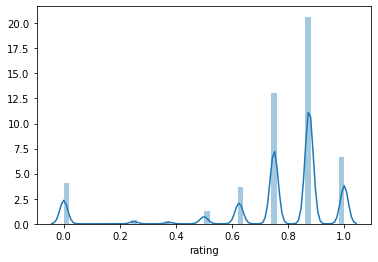

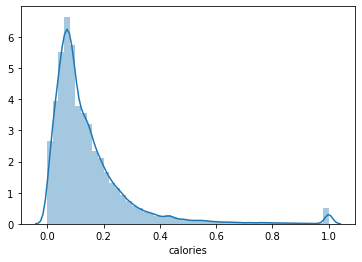

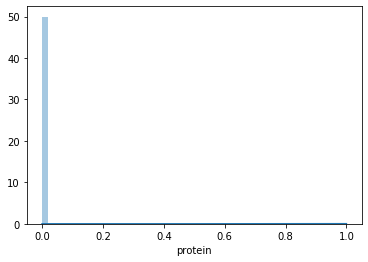

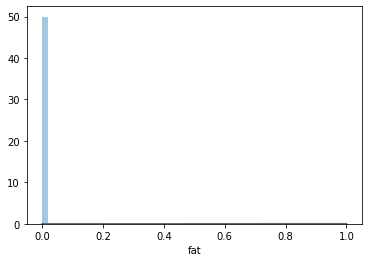

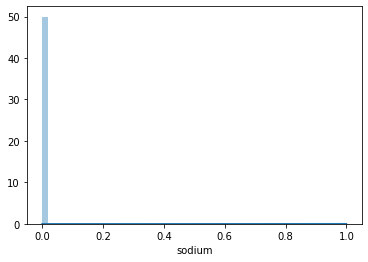

In [89]:
m1 = recipies_file.drop(['title', 'calories'], axis = 1)
m1 = m1.rename(columns={'calories_new' : 'calories'})
m1 = m1.fillna(0)

# MAX MIN SCALER

from sklearn import preprocessing

m1.head()
df2 = m1[['rating', 'calories', 'protein', 'fat', 'sodium']]
x = df2.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_min_max = pd.DataFrame(x_scaled)
nombres = ['rating', 'calories', 'protein', 'fat', 'sodium']
df_min_max.columns=nombres

# Plot distributions
import matplotlib.pyplot as plt
import seaborn as sns

for i in df_min_max.columns:
   f, ax = plt.subplots()
   sns.distplot(df_min_max[i].dropna(), ax=ax)
    
from sklearn.metrics.pairwise import cosine_similarity


m1_sim = cosine_similarity(m1)
print(m1_sim.shape)

In [90]:
m1_sim_df = pd.DataFrame(m1_sim, index = recipies_file['title'], columns = recipies_file['title'])
m1_sim_df.head()

title,"Lentil, Apple, and Turkey Wrap",Boudin Blanc Terrine with Red Onion Confit,Potato and Fennel Soup Hodge,Spinach Noodle Casserole,The Best Blts,Korean Marinated Beef,Ham Persillade with Mustard Potato Salad and Mashed Peas,"Yams Braised with Cream, Rosemary and Nutmeg",Banana-Chocolate Chip Cake With Peanut Butter Frosting,Beef Tenderloin with Garlic and Brandy,...,Chicken with White Wine and Herbs,Crispy Salt and Pepper Chicken with Caramelized Fennel and Shallots,Orange-Tini,Blueberry Compote,Chinese Barbecued Spareribs,Parmesan Puffs,Artichoke and Parmesan Risotto,Turkey Cream Puff Pie,Snapper on Angel Hair with Citrus Cream,Baked Ham with Marmalade-Horseradish Glaze
title,,,,,,,,,,,,,,,,,,,,,
"Lentil, Apple, and Turkey Wrap",1.000000,0.928945,0.990533,0.973210,0.994732,0.868078,0.951822,0.694471,0.920148,0.990851,...,0.864242,0.998855,0.650780,0.618641,0.980834,0.969788,0.978833,0.997518,0.972725,0.876989
Boudin Blanc Terrine with Red Onion Confit,0.928945,1.000000,0.871399,0.820987,0.893128,0.990135,0.997656,0.380195,0.712533,0.873456,...,0.618179,0.914698,0.325964,0.285484,0.982777,0.988431,0.835090,0.904549,0.818248,0.992364
Potato and Fennel Soup Hodge,0.990533,0.871399,1.000000,0.995272,0.998325,0.794162,0.902763,0.784685,0.964679,0.999493,...,0.923467,0.994805,0.746646,0.718177,0.946642,0.930258,0.997413,0.997059,0.994562,0.804669
Spinach Noodle Casserole,0.973210,0.820987,0.995272,1.000000,0.989785,0.732925,0.858026,0.839555,0.985432,0.994665,...,0.955876,0.981347,0.805105,0.780124,0.912125,0.891248,0.999579,0.985929,0.999492,0.744693
The Best Blts,0.994732,0.893128,0.998325,0.989785,1.000000,0.821417,0.921779,0.754190,0.951806,0.998453,...,0.904785,0.998080,0.713510,0.683814,0.960691,0.945455,0.992774,0.999328,0.988142,0.830972


In [91]:
m1_sim_df.sort_values(by=['Potato and Fennel Soup Hodge '], ascending=False)

title,"Lentil, Apple, and Turkey Wrap",Boudin Blanc Terrine with Red Onion Confit,Potato and Fennel Soup Hodge,Spinach Noodle Casserole,The Best Blts,Korean Marinated Beef,Ham Persillade with Mustard Potato Salad and Mashed Peas,"Yams Braised with Cream, Rosemary and Nutmeg",Banana-Chocolate Chip Cake With Peanut Butter Frosting,Beef Tenderloin with Garlic and Brandy,...,Chicken with White Wine and Herbs,Crispy Salt and Pepper Chicken with Caramelized Fennel and Shallots,Orange-Tini,Blueberry Compote,Chinese Barbecued Spareribs,Parmesan Puffs,Artichoke and Parmesan Risotto,Turkey Cream Puff Pie,Snapper on Angel Hair with Citrus Cream,Baked Ham with Marmalade-Horseradish Glaze
title,,,,,,,,,,,,,,,,,,,,,
Potato and Fennel Soup Hodge,0.990533,0.871399,1.000000,0.995272,0.998325,0.794162,0.902763,0.784685,0.964679,0.999493,...,0.923467,0.994805,0.746646,0.718177,0.946642,0.930258,0.997413,0.997059,0.994562,0.804669
Rosemary Popovers,0.990365,0.871346,0.999870,0.995429,0.998601,0.794055,0.902766,0.784629,0.964941,0.999598,...,0.923785,0.994917,0.746279,0.717930,0.946743,0.930171,0.997452,0.997196,0.994550,0.804515
Peanut Butter and Banana Sandwiches,0.991556,0.874839,0.999865,0.994640,0.998657,0.798408,0.905778,0.780489,0.962911,0.999421,...,0.920775,0.995471,0.742053,0.713531,0.948878,0.932422,0.997009,0.997541,0.993911,0.808834
Saffron Vichyssoise,0.989158,0.867004,0.999862,0.996121,0.998019,0.788723,0.898928,0.790260,0.967148,0.999286,...,0.926696,0.993800,0.752539,0.724420,0.943742,0.926746,0.998036,0.996342,0.995239,0.799266
German Potato Salad,0.991543,0.875311,0.999851,0.994565,0.998807,0.798998,0.906217,0.779873,0.962756,0.999374,...,0.920343,0.995505,0.741362,0.712808,0.949199,0.932756,0.996938,0.997603,0.993680,0.809342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Spritz Wreaths,0.220731,0.266868,0.207447,0.178538,0.204997,0.274841,0.260389,0.043012,0.140403,0.207008,...,0.107031,0.214108,0.046854,0.020179,0.247500,0.289513,0.183411,0.211708,0.177779,0.272521
To Clarify Butter,0.003358,0.002766,0.016789,0.004687,0.003064,0.003516,0.002073,0.014474,0.004675,0.017425,...,0.002576,0.002755,0.042041,0.020497,0.001567,0.044857,0.004647,0.005010,0.005520,0.001105
To Clarify Butter,0.003358,0.002766,0.016789,0.004687,0.003064,0.003516,0.002073,0.014474,0.004675,0.017425,...,0.002576,0.002755,0.042041,0.020497,0.001567,0.044857,0.004647,0.005010,0.005520,0.001105


In [92]:
#recipies_file.head()
#recipies_file[recipies_file['title']=='Potato and Fennel Soup Hodge ']
#recipies_file[recipies_file['title']=='Rosemary Popovers ']
recipies_file[(recipies_file['title'].isin(['Potato and Fennel Soup Hodge ', 'Rosemary Popovers ']))]

#recipies_file[(recipies_file['title'] == ['Potato and Fennel Soup Hodge ']) |  (recipies_file['title'] =='Rosemary Popovers ')]

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey,calories_new
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,165.0
19773,Rosemary Popovers,3.125,200.0,7.0,11.0,200.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,200.0


In [93]:
from scipy import spatial
def most_similar_recipe(dish):
    print("Entré a most_similar_recipie con el plato "+dish['title'])
    d1 = dish.drop('title', inplace = True)
    dish = pd.DataFrame(d1).fillna(0)
    less_distance = 999999999
    similar_dish = ''
    for index, element in recipies_file.iterrows():
        #print(element)
        title = element['title']
        d1 = element.drop('title', inplace = True)
        element = pd.DataFrame(d1).fillna(0)
        actual_distance = spatial.distance.cosine(dish.loc[0, :], element.loc[0, :])
        if less_distance > actual_distance:
            less_distance = actual_distance
            similar_dish = title
    print('The most similar dish to '+dish['title']+' is '+title)
    
most_similar_recipe(pop[0].iloc[0])

Entré a most_similar_recipie con el plato Swedish Cardamom Rolls 


C:\Users\hector\Anaconda3\lib\site-packages\pandas\core\generic.py:3917: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(obj)


KeyError: 0

In [ ]:
#pop[0].iloc[0]


#for element in pop[0].itertuples():
#    print(element)#tuple
    
for index, element in recipies_file.iterrows():
    print(element['title'])

# Rank your foods!!!!

In [ ]:
ranking
no ranking we dont know 
dont likedata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAYQAAAD4CAYAAADsKpHdAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjEsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy8QZhcZAAAT2ElEQVR4nO3df6zddX3H8ed7VESp0iJ6x9pmxdm4IY2u3EDVzdxaUwoYyxZYaogU7NK4gcOFZdQZrUFIYPPHxjJZOttYHLEg6mj4MWwKN8ZkVCgiBSr2gh1cqO1ca/EK/qi+98f5XHa8nHN77/fcc8495flIbs73+/l+Pue8++m359Xvj3NuZCaSJP1WtwuQJE0PBoIkCTAQJEmFgSBJAgwESVIxo9sFVHXSSSfl/PnzK4396U9/yvHHHz+1BbWR9bZXr9ULvVez9bbXROvdsWPHjzLz9U07ZGZP/px++ulZ1b333lt5bDdYb3v1Wr2ZvVez9bbXROsFHshx3lc9ZSRJAryGIEkqDARJEmAgSJIKA0GSBBgIkqTCQJAkAQaCJKkwECRJQA9/dYV6w/y1d3Tttfdce27XXlvqRR4hSJIAA0GSVBgIkiTAQJAkFQaCJAkwECRJhYEgSQIMBElSYSBIkgADQZJUGAiSJMBAkCQVBoIkCTAQJEmFgSBJAgwESVJhIEiSgAkEQkRsjIj9EfFIXduJEbE1InaXx9mlPSLi+ogYioiHI2JR3ZhVpf/uiFhV1356ROwsY66PiJjqP6Qk6cgmcoTwRWD5mLa1wLbMXABsK+sAZwMLys8a4AaoBQiwDjgTOANYNxoipc+aunFjX0uS1AFHDITM/CZwYEzzCmBTWd4EnFfXfmPW3AfMioiTgbOArZl5IDMPAluB5WXbazPzvzIzgRvrnkuS1EEzKo7ry8y9AJm5NyLeUNrnAE/X9RsubeO1Dzdobygi1lA7mqCvr4/BwcFKxY+MjFQe2w29XO8VCw93rY6JzlmvzS/0Xs3W215TVW/VQGim0fn/rNDeUGauB9YD9Pf358DAQIUSa28UVcd2Qy/Xe/HaO7pWx54LBybUr9fmF3qvZuttr6mqt+pdRvvK6R7K4/7SPgzMq+s3F3j2CO1zG7RLkjqsaiBsAUbvFFoF3FbXflG522gxcKicWrobWBYRs8vF5GXA3WXbTyJicbm76KK655IkddARTxlFxJeBAeCkiBimdrfQtcAtEbEaeAq4oHS/EzgHGAKeBy4ByMwDEfEp4P7S76rMHL1Q/RfU7mR6FXBX+ZEkddgRAyEz399k09IGfRO4tMnzbAQ2Nmh/ADjtSHVIktrLTypLkgADQZJUGAiSJMBAkCQVBoIkCTAQJEmFgSBJAgwESVJhIEiSAANBklQYCJIkwECQJBUGgiQJMBAkSYWBIEkCDARJUmEgSJIAA0GSVBgIkiTAQJAkFQaCJAkwECRJhYEgSQIMBElSYSBIkgADQZJUGAiSJMBAkCQVLQVCRPx1RDwaEY9ExJcj4riIOCUitkfE7oi4OSKOLX1fWdaHyvb5dc/z0dL+eESc1dofSZJUReVAiIg5wF8B/Zl5GnAMsBK4DvhcZi4ADgKry5DVwMHMfBPwudKPiDi1jHsLsBz4fEQcU7UuSVI1rZ4ymgG8KiJmAK8G9gLvBm4t2zcB55XlFWWdsn1pRERp35yZP8/MHwBDwBkt1iVJmqTIzOqDIy4HrgFeAL4BXA7cV44CiIh5wF2ZeVpEPAIsz8zhsu0J4Ezgk2XMv5f2DWXMrQ1ebw2wBqCvr+/0zZs3V6p7ZGSEmTNnVhrbDb1c785nDnWtjoVzTphQv16bX+i9mq23vSZa75IlS3ZkZn+z7TOqFhARs6n97/4U4MfAV4CzG3QdTZxosq1Z+0sbM9cD6wH6+/tzYGBgckUXg4ODVB3bDb1c78Vr7+haHXsuHJhQv16bX+i9mq23vaaq3lZOGb0H+EFm/k9m/hL4GvAOYFY5hQQwF3i2LA8D8wDK9hOAA/XtDcZIkjqklUB4ClgcEa8u1wKWAo8B9wLnlz6rgNvK8payTtl+T9bOV20BVpa7kE4BFgDfbqEuSVIFlU8ZZeb2iLgVeBA4DHyH2umcO4DNEXF1adtQhmwAvhQRQ9SODFaW53k0Im6hFiaHgUsz81dV65IkVVM5EAAycx2wbkzzkzS4SygzfwZc0OR5rqF2cVqS1CV+UlmSBBgIkqTCQJAkAQaCJKkwECRJgIEgSSoMBEkSYCBIkgoDQZIEGAiSpMJAkCQBBoIkqTAQJEmAgSBJKgwESRJgIEiSCgNBkgQYCJKkwkCQJAEGgiSpMBAkSYCBIEkqDARJEmAgSJIKA0GSBBgIkqTCQJAkAQaCJKloKRAiYlZE3BoR34uIXRHx9og4MSK2RsTu8ji79I2IuD4ihiLi4YhYVPc8q0r/3RGxqtU/lCRp8lo9Qvgn4D8z8/eBtwK7gLXAtsxcAGwr6wBnAwvKzxrgBoCIOBFYB5wJnAGsGw0RSVLnVA6EiHgt8C5gA0Bm/iIzfwysADaVbpuA88ryCuDGrLkPmBURJwNnAVsz80BmHgS2Asur1iVJqiYys9rAiLcB64HHqB0d7AAuB57JzFl1/Q5m5uyIuB24NjO/Vdq3AVcCA8BxmXl1af848EJmfrrBa66hdnRBX1/f6Zs3b65U+8jICDNnzqw0tht6ud6dzxzqWh0L55wwoX69Nr/QezVbb3tNtN4lS5bsyMz+ZttntFDDDGAR8OHM3B4R/8T/nx5qJBq05TjtL23MXE8thOjv78+BgYFJFTxqcHCQqmO7oZfrvXjtHV2rY8+FAxPq12vzC71Xs/W211TV28o1hGFgODO3l/VbqQXEvnIqiPK4v67/vLrxc4Fnx2mXJHVQ5UDIzB8CT0fEm0vTUmqnj7YAo3cKrQJuK8tbgIvK3UaLgUOZuRe4G1gWEbPLxeRlpU2S1EGtnDIC+DBwU0QcCzwJXEItZG6JiNXAU8AFpe+dwDnAEPB86UtmHoiITwH3l35XZeaBFuuSJE1SS4GQmQ8BjS5QLG3QN4FLmzzPRmBjK7VIklrjJ5UlSYCBIEkqDARJEmAgSJIKA0GSBBgIkqTCQJAkAQaCJKkwECRJgIEgSSoMBEkSYCBIkgoDQZIEGAiSpMJAkCQBBoIkqTAQJEmAgSBJKgwESRJgIEiSCgNBkgQYCJKkwkCQJAEGgiSpMBAkSYCBIEkqDARJEmAgSJKKlgMhIo6JiO9ExO1l/ZSI2B4RuyPi5og4trS/sqwPle3z657jo6X98Yg4q9WaJEmTNxVHCJcDu+rWrwM+l5kLgIPA6tK+GjiYmW8CPlf6ERGnAiuBtwDLgc9HxDFTUJckaRJaCoSImAucC3yhrAfwbuDW0mUTcF5ZXlHWKduXlv4rgM2Z+fPM/AEwBJzRSl2SpMlr9QjhH4G/BX5d1l8H/DgzD5f1YWBOWZ4DPA1Qth8q/V9sbzBGktQhM6oOjIj3Avszc0dEDIw2N+iaR9g23pixr7kGWAPQ19fH4ODgZEp+0cjISOWx3dDL9V6x8PD4ndtoonPWa/MLvVez9bbXVNVbORCAdwLvi4hzgOOA11I7YpgVETPKUcBc4NnSfxiYBwxHxAzgBOBAXfuo+jG/ITPXA+sB+vv7c2BgoFLhg4ODVB3bDb1c78Vr7+haHXsuHJhQv16bX+i9mq23vaaq3sqnjDLzo5k5NzPnU7sofE9mXgjcC5xfuq0CbivLW8o6Zfs9mZmlfWW5C+kUYAHw7ap1SZKqaeUIoZkrgc0RcTXwHWBDad8AfCkihqgdGawEyMxHI+IW4DHgMHBpZv6qDXVJksYxJYGQmYPAYFl+kgZ3CWXmz4ALmoy/BrhmKmqRJFXjJ5UlSYCBIEkqDARJEmAgSJIKA0GSBBgIkqTCQJAkAQaCJKkwECRJgIEgSSoMBEkSYCBIkgoDQZIEGAiSpMJAkCQB7fkFOZqG5nfwV1lesfBwV391pqRqPEKQJAEGgiSpMBAkSYCBIEkqDARJEmAgSJIKA0GSBBgIkqTCQJAkAQaCJKkwECRJgIEgSSoMBEkS0EIgRMS8iLg3InZFxKMRcXlpPzEitkbE7vI4u7RHRFwfEUMR8XBELKp7rlWl/+6IWNX6H0uSNFmtHCEcBq7IzD8AFgOXRsSpwFpgW2YuALaVdYCzgQXlZw1wA9QCBFgHnAmcAawbDRFJUudUDoTM3JuZD5blnwC7gDnACmBT6bYJOK8srwBuzJr7gFkRcTJwFrA1Mw9k5kFgK7C8al2SpGoiM1t/koj5wDeB04CnMnNW3baDmTk7Im4Hrs3Mb5X2bcCVwABwXGZeXdo/DryQmZ9u8DprqB1d0NfXd/rmzZsr1TsyMsLMmTMrje2Gqah35zOHpqiaI+t7Fex7oWMv19TCOSdMqF+v7Q/QezVbb3tNtN4lS5bsyMz+Zttb/o1pETET+Crwkcx8LiKadm3QluO0v7Qxcz2wHqC/vz8HBgYmXS/A4OAgVcd2w1TU28nfYHbFwsN8Zmf3fxnfngsHJtSv1/YH6L2arbe9pqrelu4yiohXUAuDmzLza6V5XzkVRHncX9qHgXl1w+cCz47TLknqoFbuMgpgA7ArMz9bt2kLMHqn0Crgtrr2i8rdRouBQ5m5F7gbWBYRs8vF5GWlTZLUQa0c178T+ACwMyIeKm1/B1wL3BIRq4GngAvKtjuBc4Ah4HngEoDMPBARnwLuL/2uyswDLdQlSaqgciCUi8PNLhgsbdA/gUubPNdGYGPVWiRJrfOTypIkwECQJBUGgiQJMBAkSYWBIEkCpuCTytJ0NX+Cn86+YuHhKf0k955rz52y55I6ySMESRJgIEiSCgNBkgQYCJKkwkCQJAEGgiSpMBAkSYCBIEkqDARJEmAgSJIKA0GSBBgIkqTCQJAkAQaCJKkwECRJgIEgSSoMBEkSYCBIkgoDQZIEGAiSpGJGtwt4OZnoL30fa6p/CbwkNeIRgiQJmEaBEBHLI+LxiBiKiLXdrkeSXm6mRSBExDHAvwBnA6cC74+IU7tblSS9vEyXawhnAEOZ+SRARGwGVgCPtePFdj5zyHPyapuq14omo9F1pT3Xntv219XRLTKz2zUQEecDyzPzz8v6B4AzM/OyMf3WAGvK6puBxyu+5EnAjyqO7Qbrba9eqxd6r2brba+J1vu7mfn6ZhunyxFCNGh7SVJl5npgfcsvFvFAZva3+jydYr3t1Wv1Qu/VbL3tNVX1TotrCMAwMK9ufS7wbJdqkaSXpekSCPcDCyLilIg4FlgJbOlyTZL0sjItThll5uGIuAy4GzgG2JiZj7bxJVs+7dRh1ttevVYv9F7N1tteU1LvtLioLEnqvulyykiS1GUGgiQJOMoD4UhfhxERr4yIm8v27RExv/NVvljLvIi4NyJ2RcSjEXF5gz4DEXEoIh4qP5/oRq119eyJiJ2llgcabI+IuL7M78MRsagbdZZa3lw3bw9FxHMR8ZExfbo+vxGxMSL2R8QjdW0nRsTWiNhdHmc3Gbuq9NkdEau6WO8/RMT3yt/51yNiVpOx4+4/Haz3kxHxTN3f+zlNxnb863Wa1HtzXa17IuKhJmMnP7+ZeVT+ULs4/QTwRuBY4LvAqWP6/CXwr2V5JXBzF+s9GVhUll8DfL9BvQPA7d2e27p69gAnjbP9HOAuap8zWQxs73bNdfvGD6l9SGdazS/wLmAR8Ehd298Da8vyWuC6BuNOBJ4sj7PL8uwu1bsMmFGWr2tU70T2nw7W+0ngbyawz4z7ftKpesds/wzwiama36P5COHFr8PIzF8Ao1+HUW8FsKks3wosjYhGH5Jru8zcm5kPluWfALuAOd2oZQqtAG7MmvuAWRFxcreLApYCT2Tmf3e7kLEy85vAgTHN9fvpJuC8BkPPArZm5oHMPAhsBZa3rdCiUb2Z+Y3MPFxW76P2uaJpocn8TsRE3k+m3Hj1lveqPwO+PFWvdzQHwhzg6br1YV76Bvtin7IDHwJe15HqxlFOXf0hsL3B5rdHxHcj4q6IeEtHC3upBL4RETvK14qMNZG/g25YSfN/RNNpfkf1ZeZeqP3HAXhDgz7Tda4/SO0osZEj7T+ddFk5xbWxySm56Ti/fwzsy8zdTbZPen6P5kCYyNdhTOgrMzopImYCXwU+kpnPjdn8ILXTHG8F/hn4j07XN8Y7M3MRtW+pvTQi3jVm+3Sc32OB9wFfabB5us3vZEzHuf4YcBi4qUmXI+0/nXID8HvA24C91E7DjDXt5hd4P+MfHUx6fo/mQJjI12G82CciZgAnUO1wckpExCuohcFNmfm1sdsz87nMHCnLdwKviIiTOlxmfT3Plsf9wNepHVbXm45fSXI28GBm7hu7YbrNb519o6fayuP+Bn2m1VyXi9rvBS7MckJ7rAnsPx2Rmfsy81eZ+Wvg35rUMd3mdwbwp8DNzfpUmd+jORAm8nUYW4DRuzHOB+5ptvO2WzkfuAHYlZmfbdLnt0evcUTEGdT+/v63c1X+Ri3HR8RrRpepXUh8ZEy3LcBF5W6jxcCh0VMfXdT0f1XTaX7HqN9PVwG3NehzN7AsImaXUx7LSlvHRcRy4ErgfZn5fJM+E9l/OmLMda0/aVLHdPt6nfcA38vM4UYbK89vu6+Sd/OH2l0u36d2d8DHSttV1HZUgOOonToYAr4NvLGLtf4RtUPQh4GHys85wIeAD5U+lwGPUrvD4T7gHV2s942lju+Wmkbnt77eoPaLj54AdgL9Xd4fXk3tDf6EurZpNb/Uwmov8Etq/ytdTe261jZgd3k8sfTtB75QN/aDZV8eAi7pYr1D1M63j+7Ho3fy/Q5w53j7T5fq/VLZPx+m9iZ/8th6y/pL3k+6UW9p/+LoflvXt+X59asrJEnA0X3KSJI0CQaCJAkwECRJhYEgSQIMBElSYSBIkgADQZJU/B9m+Gnhzc3WBwAAAABJRU5ErkJggg==
####################################
###                              ###
###           Meat               ###            
###                              ###       
####################################
meat = '*****'
chicken = ''
fish = '****'
lamb = '***'
pork = '***'
shrimp = '****'

####################################
###                              ###
###     Veggies & Grains         ###            
###                              ###       
####################################
avocado = '*****'
potato = '*****'
olives = '-1'
rice = '*'
lettuce = '****'
cereal = '*'
sweet_potato = '-1'
pumpkin = '**'
tomato = '*****'
carrot = '**'
onion = '*****'

# Methods to try
### these are the methods

- Mixed Integer Programming
- Linear Programming
- Que no se parezcan los platos: cosin_similarity